# Análisis de Componentes Principales para Reducción de Dimensiones en Reconocimiento Facial

Este programa tiene como objetivo principal (1) expandir en los usos del Análisis de Componentes Principales (*PCA*), demostrando que se puede optimizar el uso de almacenamiento en una base de datos de reconocimiento facial mediante la reducción de dimensionalidad de las fotografías de las caras haciendo uso del uso del *PCA*. Además de esto, el programa busca:

(2) Comparar la efectividad de esta optimización dependiendo del número de componentes a los que se reduce y la varianza que se conserva al aplicar el *PCA*

(3) Comparar la efectividad de un análisis *PCA* recursivo y uno normal

A lo largo del programa se verán en las distintas partes de este los números entre paréntesis correspondientes a cada objetivo.

### Metodología

Se importan las librerias necesarias para trabajar con la base de datos y hacer el análisis *PCA*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA

Se importa el conjunto de datos con el que se trabajará y se crea la variable people, la cual contendrá los nombres y rostros de las personas. Asimismo, se imporimen los nombres de las personas para asegurar que el proceso se llevó a cabo de manera correcta.

Es importante mencionar que cada una de las caras en el dataset cuenta con alrededor de 3000 componentes, y sobre estos se hará el *PCA*.

In [2]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=90)

for name in people.target_names:
    print(name)

Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Tony Blair


Creamos una variable pca300 que será un *PCA* hecho para reducir el dataset dado a 300 componentes, y se lo aplicamos a las caras del paso anterior

In [3]:
pca300 = PCA(300)
pca300.fit(people.data)

PCA(n_components=300)

Extraemos los componentes del *PCA* hecho en la celda anterior, y mediante una transformación inversa, el programa reconstruye, en base a los 300 componentes extraídos, una proyección de como lucirá la cara en cuestión.

In [4]:
componentes300 = pca300.transform(people.data)
proyeccion300 = pca300.inverse_transform(componentes300)

Se grafican las caras del dataset original vs las caras que el programa reconstruyó a partir de los 300 componentes principales obtenidos después del *PCA*.

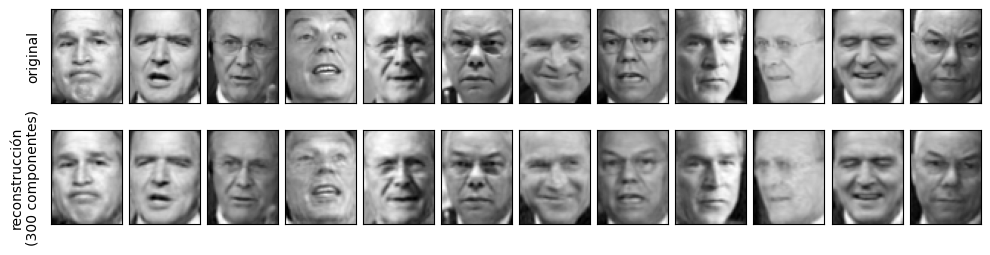

In [30]:
fig, ax = plt.subplots(2, 12, figsize=(12, 3),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0, i].imshow(people.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proyeccion300[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('original')
ax[1, 0].set_ylabel('reconstrucción\n(300 componentes)')

plt.savefig('Reconstruccion.jpg')

La fila superior muestra las imágenes originales; la fila inferior muestra las imágenes reconstruidas a partir de sólo 300 de las ~3000 características iniciales. 

(1) Esta visualización nos permite apreciar la eficiencia de la reducción de dimensionalidad.

Esta reducción  de la dimensionalidad de los datos se puede apreciar de mejor manera si analizamos qué porcentaje de la varianza de los datos se conserva después de realizar el *PCA*.

A continuación se grafica para 300 componentes la varianza explicada acumulada (cumulative explained variance), la cual representa la cantidad de varianza que se conserva para cada componente principal.

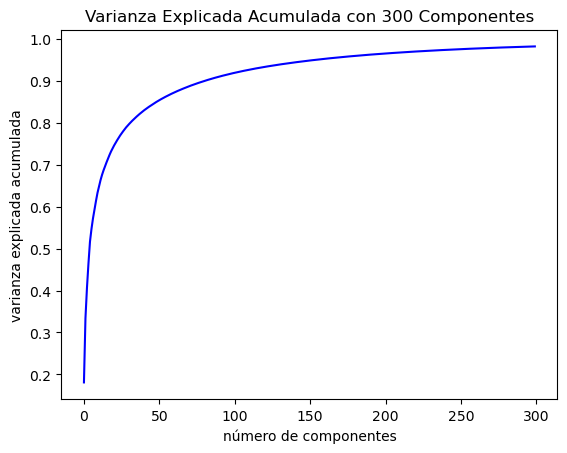

In [6]:
plt.plot(np.cumsum(pca300.explained_variance_ratio_), color='b')

plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada')
plt.title("Varianza Explicada Acumulada con 300 Componentes") 

plt.savefig('VEA1.jpg')

Podemos observar que utilizando 300 componentes se conserva más del 97% de la varianza, lo cual logra el objetivo principal, como observamos anteriormente. ¿Qué  pasa si se conserva menos varianza?.

A continuación, (2) se compararán el número de componentes a los que se reduce y la varianza que se conserva al aplicar el *PCA*, y como luce esto tanto gráficamente como aplicado al dataset con el que se está trabajando.

Primero, se crean las variables pca , se extraen estos componentes y se reconstruyen las caras a partir de una transformación inversa para cada número de componentes: en este caso 50, 100 y 200 (ya que la de 300 ya está hecha).

In [7]:
#Extracción de componentes y recontsrucción para 200 componentes
pca200 = PCA(200)
pca200.fit(people.data)
componentes200 = pca200.transform(people.data)
proyeccion200 = pca200.inverse_transform(componentes200)

#Extracción de componentes y recontsrucción para 100 componentes
pca100 = PCA(100)
pca100.fit(people.data)
componentes100 = pca100.transform(people.data)
proyeccion100 = pca100.inverse_transform(componentes100)

#Extracción de componentes y recontsrucción para 50 componentes
pca50 = PCA(50)
pca50.fit(people.data)
componentes50 = pca50.transform(people.data)
proyeccion50 = pca50.inverse_transform(componentes50)

A continuación se grafica la varianza explicada acumulada para 50, 100, 200 y 300 componentes.

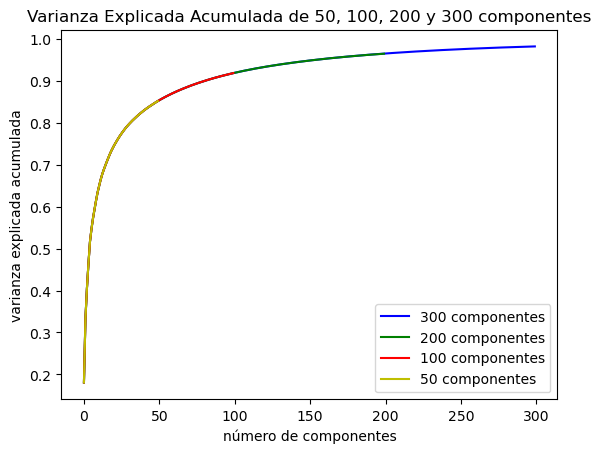

In [8]:

plt.plot(np.cumsum(pca300.explained_variance_ratio_), color='b', label='300 componentes')

plt.plot(np.cumsum(pca200.explained_variance_ratio_), color='g', label='200 componentes')

plt.plot(np.cumsum(pca100.explained_variance_ratio_), color='r', label='100 componentes')

plt.plot(np.cumsum(pca50.explained_variance_ratio_), color='y', label='50 componentes')


plt.legend()

plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada')
plt.title("Varianza Explicada Acumulada de 50, 100, 200 y 300 componentes") 

plt.savefig('VEA2.jpg')

In [9]:
print('300: ', np.cumsum(pca300.explained_variance_ratio_)[299]) #0.982267
print('200: ', np.cumsum(pca200.explained_variance_ratio_)[199]) #0.965878
print('100: ', np.cumsum(pca100.explained_variance_ratio_)[99]) #0.918525
print('50: ', np.cumsum(pca50.explained_variance_ratio_)[49]) #0.851898

300:  0.9822622
200:  0.96487725
100:  0.9185286
50:  0.85194206


Como se puede observar, 50 componentes conservan ~85% de la varianza, 100 componentes ~92% de la varianza, 200 componentes ~95% de la varianza y, finalmente, 300 componentes conservan ~97% de la varianza. Esto proporciona una idea general de la exactitud con la que el programa reconstruirá los rostros para cada número de componentes; pero a continuación se comparan las recontrucciones hechas por el programa para cada número de componentes.

Se grafican las caras que el programa reconstruyó a partir de:
- 300 componentes principales 
- 200 componentes principales
- 100 componentes principales
- 50 componentes principales
obtenidos después del *PCA*.

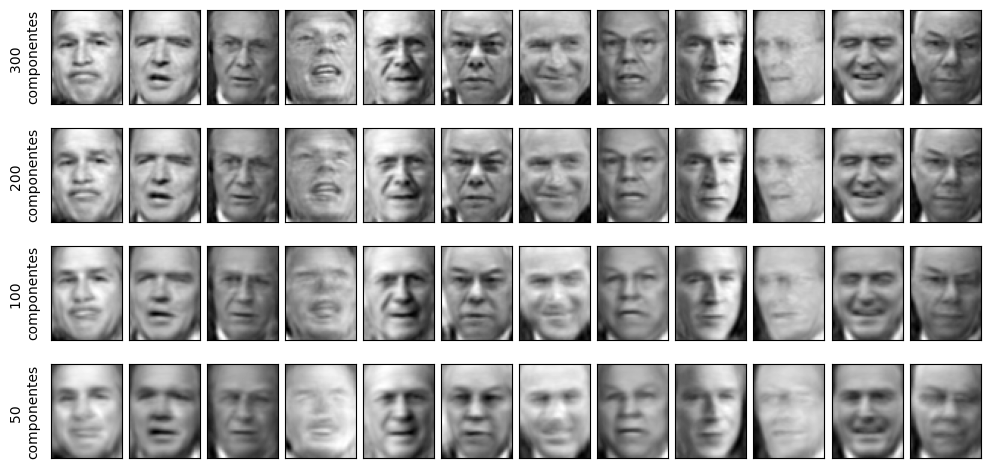

In [28]:
fig, ax = plt.subplots(4, 12, figsize=(12, 6),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0, i].imshow(proyeccion300[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proyeccion200[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(proyeccion100[i].reshape(62, 47), cmap='binary_r')
    ax[3, i].imshow(proyeccion50[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('300 \ncomponentes')
ax[1, 0].set_ylabel('200 \ncomponentes')
ax[2, 0].set_ylabel('100 \ncomponentes')
ax[3, 0].set_ylabel('50 \ncomponentes')


plt.savefig('4componentesComparados.jpg')

A continuación (3) se compara de la misma manera qué es lo que sucede al realizar un *PCA* normal de cierto número de componentes y un *PCA* hecho a datos a los cuales se les hizo previamente un *PCA* (*PCA* iterativo).

En este caso, se comparará un *PCA* simple de 200 componentes con un *PCA* de 600 componentes al que se le aplica un *PCA* de 200 componentes. Para simplicidad, se le llamará *PCA* de 600-200 componentes a este último.

Se crea el *PCA* de 600 componentes, se extraen los componentes y se reconstruyen las caras a partir de estos 600 componentes principales

In [11]:
#Extracción de componentes y recontsrucción para 200 componentes
pca600 = PCA(600)
pca600.fit(people.data)
componentes600 = pca600.transform(people.data)
proyeccion600 = pca600.inverse_transform(componentes600)

Se le aplica un *PCA* de 200 componentes a la proyección de las caras del *PCA* de 600 componentes

In [12]:
pca600200 = PCA(200)
pca600200.fit(proyeccion600)
componentes600200 = pca600200.transform(proyeccion600)
proyeccion600200 = pca600200.inverse_transform(componentes600200)

Se compara, gráficamente, la varianza que retiene el *PCA* regular de 200 componentes vs el *PCA* de 600-200 componentes

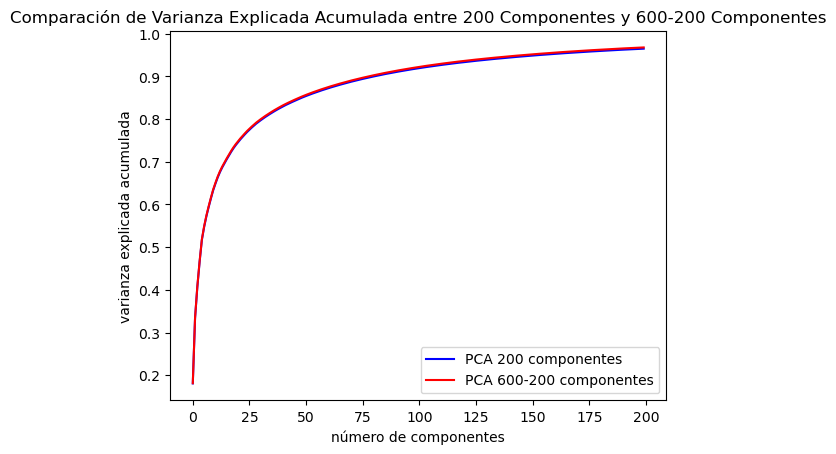

In [13]:
plt.plot(np.cumsum(pca200.explained_variance_ratio_), color='b', label='PCA 200 componentes')

plt.plot(np.cumsum(pca600200.explained_variance_ratio_), color='r', label='PCA 600-200 componentes')


plt.legend()

plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada');
plt.title("Comparación de Varianza Explicada Acumulada entre 200 Componentes y 600-200 Componentes") 

plt.savefig('VEA3.jpg')

Adicionalmente, se calcula la varianza explicada acumulada del *PCA* de 200 componentes:

In [14]:
print(np.cumsum(pca200.explained_variance_ratio_)[199])

0.96487725


y del *PCA* de 600-200 componentes:

In [15]:
print(np.cumsum(pca600200.explained_variance_ratio_)[199])

0.96781635


Podemos observar que estas dos varianzas son muy similares entre sí: con la de 600-200 componentes reteniendo solamente ~0.3% adicional. Para esta base de datos en específico un *PCA* recursivo de dos iteraciones no representó una ventaja significativa ante el normal; pero ¿qué sucede con más iteraciones?

Se aplicará el mismo proceso que se realizó para el *PCA* de 600-200 componentes, pero ahora uno que pase de 1000 a 750 a 500 a 200 componentes y observaremos qué sucede con la varianza explicada acumulada. Para simplicidad, se referirá a este como *PCA* de 1000-200 componentes.

In [16]:
#PCA de 1000 componentes: extracción y reconstrucción
pca1000 = PCA(1000)
pca1000.fit(people.data)
componentes1000 = pca1000.transform(people.data)
proyeccion1000 = pca1000.inverse_transform(componentes1000)

#PCA de 750 componentes aplicado al PCA anterior: extracción y reconstrucción
pca750 = PCA(750)
pca750.fit(proyeccion1000)
componentes750 = pca750.transform(proyeccion1000)
proyeccion750 = pca750.inverse_transform(componentes750)

#PCA de 500 componentes aplicado al PCA anterior: extracción y reconstrucción
pca500 = PCA(500)
pca500.fit(proyeccion750)
componentes500 = pca500.transform(proyeccion750)
proyeccion500 = pca500.inverse_transform(componentes500)

#PCA de 200 componentes aplicado al PCA anterior: extracción y reconstrucción
pca1000200 = PCA(200)
pca1000200.fit(proyeccion500)
componentes1000200 = pca1000200.transform(proyeccion500)
proyeccion1000200 = pca1000200.inverse_transform(componentes1000200)

Se compara, gráficamente, la varianza que retiene el *PCA* regular de 200 componentes vs el *PCA* de 600-200 componentes vs el *PCA* de 1000-200 componentes

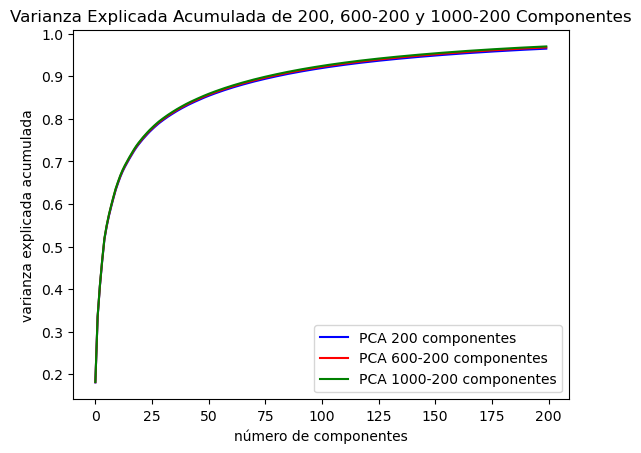

In [32]:
plt.plot(np.cumsum(pca200.explained_variance_ratio_), color='b', label='PCA 200 componentes')

plt.plot(np.cumsum(pca600200.explained_variance_ratio_), color='r', label='PCA 600-200 componentes')

plt.plot(np.cumsum(pca1000200.explained_variance_ratio_), color='g', label='PCA 1000-200 componentes')


plt.legend()

plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada')
plt.title("Varianza Explicada Acumulada de 200, 600-200 y 1000-200 Componentes") 


plt.savefig('VEA4.jpg')

Adicionalmente, se calcula la varianza explicada acumulada del *PCA* de 200 componentes:

In [18]:
print(np.cumsum(pca200.explained_variance_ratio_)[199])

0.96487725


, del *PCA* de 600-200 componentes:

In [19]:
print(np.cumsum(pca600200.explained_variance_ratio_)[199])

0.96781635


y del *PCA* de 1000-200 componentes:

In [20]:
print(np.cumsum(pca1000200.explained_variance_ratio_)[199])

0.9701332


Podemos observar, de igual manera, que las varianzas son muy similares entre sí: con la de 1000-200 componentes reteniendo solamente ~0.5% adicional sobre el original de 200 componentes. 

Para observar más contundentemente qué representan estos porcentajes adicionales de varianza, se grafican las caras del  que el programa reconstruyó a partir de 200 componentes principales, de 600-200 componentes principales, y de 1000-200 componentes principales.

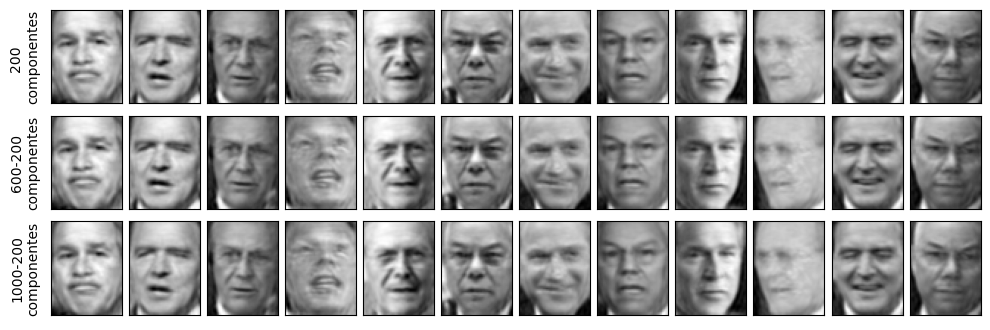

In [29]:
fig, ax = plt.subplots(3, 12, figsize=(12, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0, i].imshow(proyeccion200[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proyeccion600200[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(proyeccion1000200[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('200 \ncomponentes')
ax[1, 0].set_ylabel('600-200\ncomponentes')
ax[2, 0].set_ylabel('1000-200\ncomponentes')

plt.savefig('PCAiterativoComparacion.jpg')

### Análisis de resultados

#### Objetivo 1:

Text(0, 0.5, 'reconstrucción\n(300 componentes)')

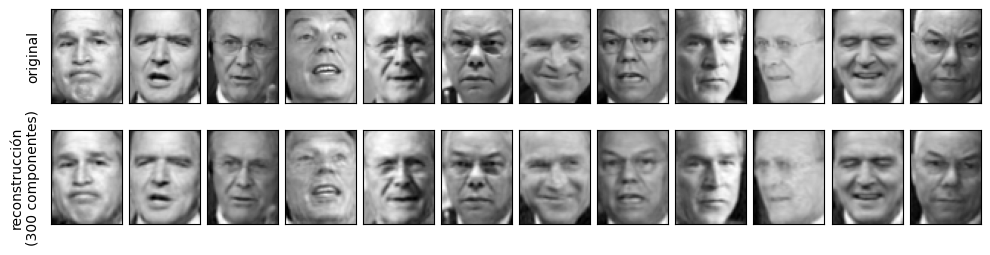

In [22]:
fig, ax = plt.subplots(2, 12, figsize=(12, 3),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0, i].imshow(people.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proyeccion300[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('original')
ax[1, 0].set_ylabel('reconstrucción\n(300 componentes)')

Este gráfico compara las imágenes originales del conjunto de datos con el que se trabajó (~3000 componentes), con las imágenes reconstruidas por el programa a partir de 300 componentes principales.

Esta visualización nos permite apreciar la eficiencia de la reducción de dimensionalidad. Las imágenes de la fila inferior tienen solamente ~10% de los componentes de la fila superior y, a pesar de esto, contienen suficiente información para que podamos reconocer a simple vista a los individuos de la imagen. Esto implica que podemos hacer mucho más eficiente el proceso de entrenar a un algoritmo de machine learning, ya que en vez de estarlo entrenando con datos de 3000 dimensiones, lo estaríamos entrenando con datos de 300 dimensiones. Esto también significa que, si fueramos a almacenar estas imágenes, podríamos almacenar 10 veces más imágenes si estas contienen 300 dimensiones en vez de 3000, haciendo mucho más eficientes tanto el proceso de almacenamiento de los datos como el de entrenamiento del algoritmo que vayamos a utilizar.

#### Objetivo 2:

Text(0, 0.5, '50 \ncomponentes\n(~85% varianza)')

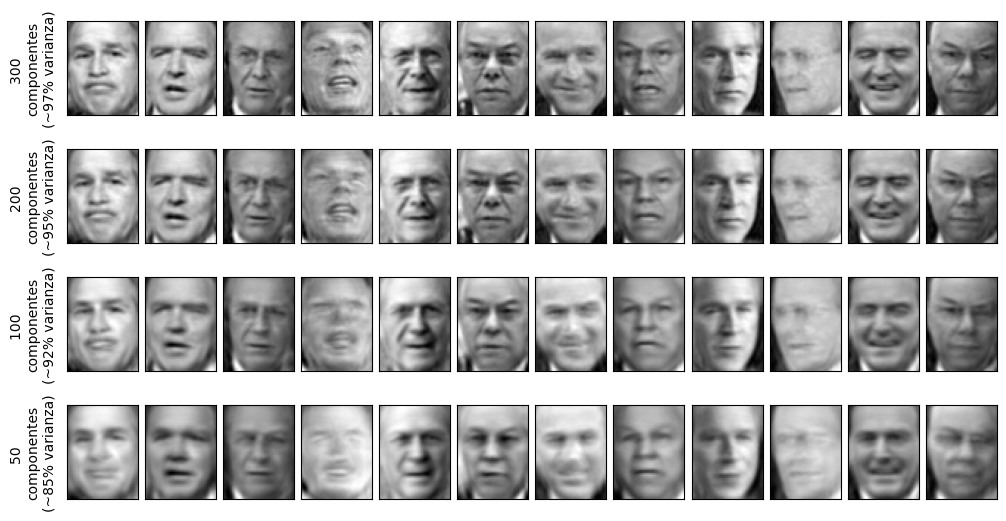

In [23]:
fig, ax = plt.subplots(4, 12, figsize=(12, 6.5),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0, i].imshow(proyeccion300[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proyeccion200[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(proyeccion100[i].reshape(62, 47), cmap='binary_r')
    ax[3, i].imshow(proyeccion50[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('300 \ncomponentes\n(~97% varianza)')
ax[1, 0].set_ylabel('200 \ncomponentes\n(~95% varianza)')
ax[2, 0].set_ylabel('100 \ncomponentes\n(~92% varianza)')
ax[3, 0].set_ylabel('50 \ncomponentes\n(~85% varianza)')

Este gráfico compara las recosntrucciones de las imágenes hechas a partir de 300, 200, 100 y 50 componentes, respectivamente.

Esta visualización nos permite apreciar la importancia de tener una retención significativa de la varianza al aplicar un *PCA* a un conjunto de datos. Podemos resaltar la importancia de retener, al menos, el 95% de la varianza de los datos, ya que en las reconstrucciones de 100 y 50 componentes se observan imagenes de rostros muy difíciles o imposibles de reconocer. Comparando las reconstrucciones de 300 y 200 componentes, podemos observar que, a pesar de que en ambas los rostros son bastante reconocibles, ciertas características como las gafas correspondientes a la quinta y sexta cara se aprecian con mucha más facilidad reteniendo el 2% de la varianza adicional que retiene la reconstrucción de 300 componentes sobre la de 200, por lo que es importante tener en cuenta qué tantos detalles de estos se quieren retener o se pueden perder sin sacrificar tanta información al hacer un *PCA* a un conjunto de datos con el que se va trabajar.

#### Objetivo 3:

Text(0, 0.5, '1000-200\ncomponentes')

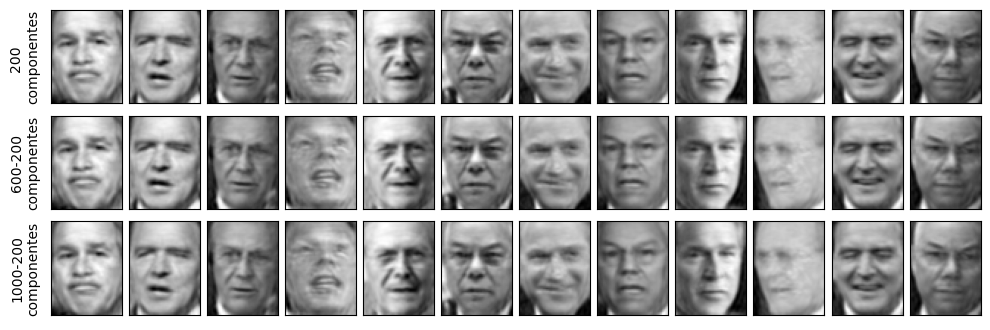

In [24]:
fig, ax = plt.subplots(3, 12, figsize=(12, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0, i].imshow(proyeccion200[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(proyeccion600200[i].reshape(62, 47), cmap='binary_r')
    ax[2, i].imshow(proyeccion1000200[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('200 \ncomponentes')
ax[1, 0].set_ylabel('600-200\ncomponentes')
ax[2, 0].set_ylabel('1000-200\ncomponentes')

Este gráfico compara las reconstrucciones de las imágenes hechas a partir de 200 componentes, de 600 componentes a 200 componentes con un *PCA* recursivo de dos iteraciones y de 1000 a 750 a 500 a 200 componentes con un *PCA* recursivo de 4 iteraciones.

A pesar de que esta visualización no nos permite verlo a simple vista, con respecto al *PCA* simple de 200 componentes, el *PCA* recursivo de 2 iteraciónes conservó ~0.3% más varianza explicada acumulada y el de 4 iteraciones ~0.5% más varianza explicada acumulada. A pesar de que estos análisis iterativos requirieron más tiempo para completarse, es cierto que conservaron más varianza que el simple utilizando la misma cantidad de componentes principales, por lo que podemos concluir que es más eficiente un *PCA* iterativo relacionando específicamente el número de componentes vs la varianza explicada acumulada. Dicho esto, para este conjunto de datos este incremento mínimo de varianza no representó una diferencia significativa, por lo que depende mucho del conjunto de datos con el que se trabaje si vale la pena el mayor tiempo de análisis que representa el *PCA* iterativo con respecto al normal.